In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/laptop_price - dataset.csv")

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df.shape

(1275, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("------------------------")

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------------------
Product
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: count, Length: 618, dtype: int64
------------------------
TypeName
Notebook              707
Gaming                205
Ultrabook             1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
CPU_Frequency (GHz),1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6
RAM (GB),1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight (kg),1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price (Euro),1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0


In [ ]:
df.describe(include="object")

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,3,93,39,4,106,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,Windows 10
freq,291,30,707,505,1214,193,412,704,280,1048


In [ ]:
mean = df["Price (Euro)"].mean()
standardized_value = (df["Price (Euro)"] - mean) / np.std(df["Price (Euro)"])

<Axes: >

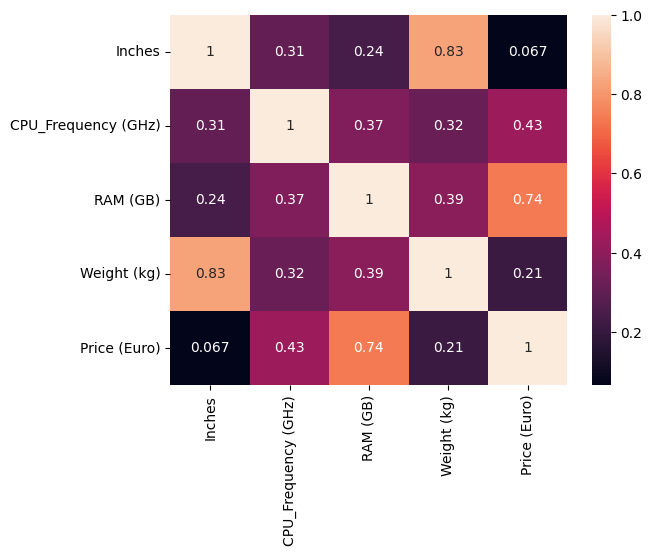

In [ ]:
s = df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

In [ ]:
X = df.drop("Price (Euro)",axis=1)

In [ ]:
y = df["Price (Euro)"]

In [ ]:
str_cols = X.select_dtypes(include="object").columns

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")
X_encoded = pd.DataFrame(ohe.fit_transform(X[str_cols]).toarray())

In [ ]:
X = pd.concat([X.drop(str_cols,axis=1),X_encoded],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error",mse)
r2 = r2_score(y_test,y_pred)

Mean Squared Error 4.94293244976799e+22


In [ ]:
new_df = pd.read_csv("/content/laptop_price - dataset.csv")

In [ ]:
new_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

<Axes: >

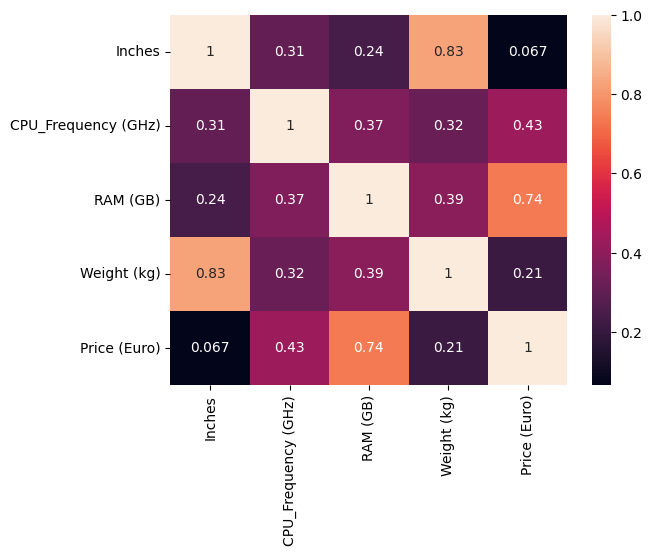

In [ ]:
s = new_df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

In [ ]:
mean = df["Price (Euro)"].mean()
standardized_value = (df["Price (Euro)"] - mean) / np.std(df["Price (Euro)"])

In [ ]:
standardized_value

,Price (Euro)
0,0.292259
1,-0.336954
2,-0.799410
3,2.002178
4,0.954536
...,...
1270,-0.709472
1271,0.519690
1272,-1.293359
1273,-0.529594


In [ ]:
prediction = model.predict(X_test)

In [ ]:
print("Predictade values",prediction)

Predictade values [ 5.31696838e+02  8.12480774e+02  1.58831451e+03  3.83439432e+11
  1.72142340e+03  6.77398499e+02  1.13721783e+03  2.73332022e+11
  1.15719271e+11  6.11820129e+02 -2.64463337e+10  9.24114301e+10
  5.61188904e+10 -6.21601736e+10  2.73910553e+03  6.18645447e+02
  4.45582349e+11  3.63443468e+09 -3.86875481e+11  9.36026741e+10
 -2.22686184e+12  7.06309097e+11  1.67853619e+03  4.18551030e+08
  6.77119934e+02  3.63443574e+09  9.56126770e+02  4.88585510e+02
  4.86148621e+11 -2.64463719e+10  1.00821295e+03  5.04485413e+02
  1.12883417e+03 -8.41870603e+11  1.55021459e+11  8.38647278e+02
  1.65898778e+10 -6.35731817e+10 -2.64463719e+10  9.39093323e+02
  1.30005035e+03  1.00065905e+11 -2.64463719e+10  5.61188907e+10
  8.84156311e+02  5.61188905e+10  5.61188908e+10  6.05803284e+02
 -7.07774458e+10  1.00631940e+03 -7.07774464e+10  2.73187823e+09
  2.41685553e+03  2.73187798e+09  5.91314270e+02  1.70676080e+03
  1.14369269e+03  1.55906573e+03  1.30277618e+03  6.88989319e+02
 -2.544